In [1]:
import xarray as xr
import pandas as pd
%matplotlib inline

In [2]:
ds=xr.open_dataset('/g/data/oe9/original/ls8_sampson_flat.nc')
ds

<xarray.Dataset>
Dimensions:          (time: 10, x: 583, y: 697)
Coordinates:
  * time             (time) datetime64[ns] 2014-11-01T00:33:44 ...
  * y                (y) float64 -3.805e+06 -3.805e+06 -3.805e+06 -3.805e+06 ...
  * x                (x) float64 6.151e+05 6.151e+05 6.151e+05 6.151e+05 ...
Data variables:
    coastal_aerosol  (time, y, x) float32 ...
    blue             (time, y, x) float32 ...
    green            (time, y, x) float32 ...
    red              (time, y, x) float32 ...
    nir              (time, y, x) float32 ...
    swir1            (time, y, x) float32 ...
    swir2            (time, y, x) float32 ...
Attributes:
    crs:      EPSG:3577
    history:  Extracted from the GA Datacube by Zac Hatfield-Dodds with query...

In [3]:
ds.red

<xarray.DataArray 'red' (time: 10, y: 697, x: 583)>
[4063510 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2014-11-01T00:33:44 2014-11-17T00:33:45 ...
  * y        (y) float64 -3.805e+06 -3.805e+06 -3.805e+06 -3.805e+06 ...
  * x        (x) float64 6.151e+05 6.151e+05 6.151e+05 6.151e+05 6.152e+05 ...

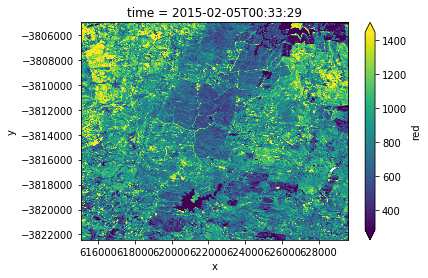

In [4]:
ds.red.isel(time=6).plot.imshow(robust=True) 
#robust creates colorscale using 99 percentile of data

In [8]:
ds.time

<xarray.DataArray 'time' (time: 10)>
array(['2014-11-01T00:33:44.000000000', '2014-11-17T00:33:45.000000000',
       '2014-12-03T00:33:44.000000000', '2014-12-19T00:33:40.500000000',
       '2015-01-04T00:33:35.500000000', '2015-01-20T00:33:32.000000000',
       '2015-02-05T00:33:29.000000000', '2015-02-21T00:33:22.000000000',
       '2015-03-09T00:33:13.000000000', '2015-03-25T00:33:04.500000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2014-11-01T00:33:44 2014-11-17T00:33:45 ...

In [9]:
ndvi = (ds.nir-ds.red)/(ds.nir+ds.red)
ndvi

<xarray.DataArray (time: 10, y: 697, x: 583)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ..., 
        [ 0.419855,  0.435233, ...,  0.616239,  0.646722],
        [ 0.405104,  0.408059, ...,  0.650366,  0.670014]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ..., 
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ..., 
       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ..., 
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,  0.432594,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ..., 
        [ 0.297063,  0.290212, ...,       nan,       

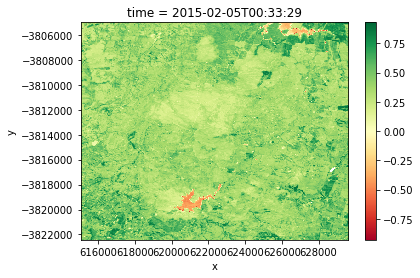

In [13]:
ndvi.isel(time=6).plot.imshow(cmap='RdYlGn')

In [14]:
ds.attrs

OrderedDict([('crs', 'EPSG:3577'),
             ('history',
              "Extracted from the GA Datacube by Zac Hatfield-Dodds with query {'time': ('2014-11', '2015-04'), 'lon': (138.75, 138.9), 'lat': (-34.85, -34.7)}")])

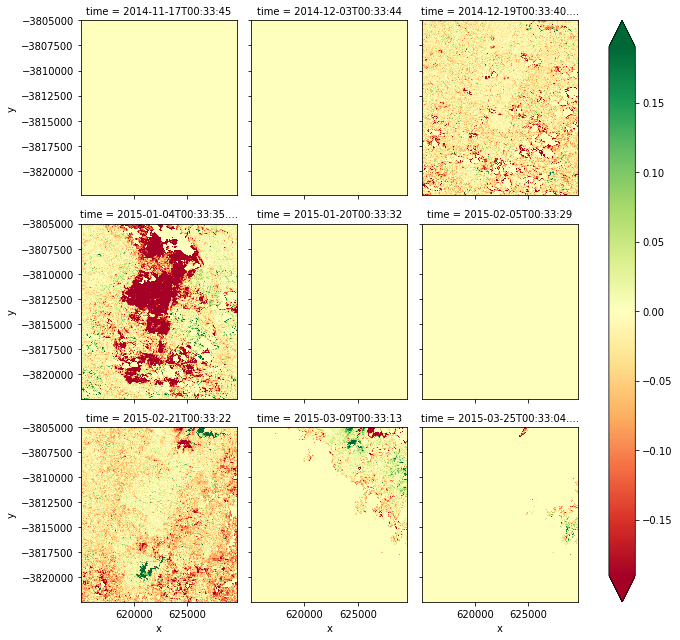

In [18]:
#difference along time dimension (n-1 dimensional array)
#bug in xarray won't allow plot with all NaNs, so replace with 0
#gdat, rasterio for reprojecting coordinates
change=ndvi.diff(dim='time').fillna(0)
change.plot.imshow(col='time',robust=True,col_wrap=3,cmap='RdYlGn')

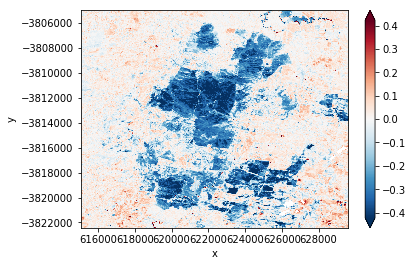

In [21]:
# select only data from a subset
ndvi.sel(time='2014')
#difference between two particular time slices
(ndvi.isel(time=6) - ndvi.isel(time=2)).plot.imshow(robust=True)

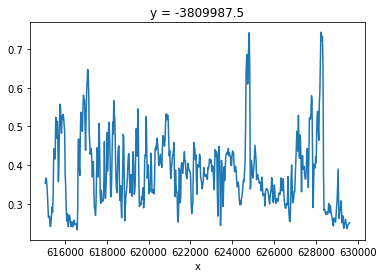

In [32]:
line = ndvi.sel(y=-3810000,method='nearest').mean(dim='time')
line.plot()

In [33]:
line.y


<xarray.DataArray 'y' ()>
array(-3809987.5)
Coordinates:
    y        float64 -3.81e+06

In [34]:
#convert from dataarray w/1 dim to number
float(line.y)

-3809987.5

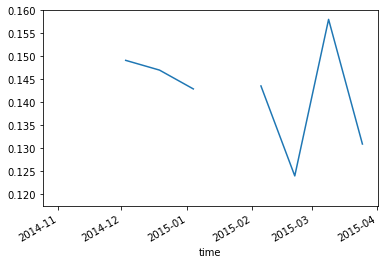

In [36]:
ndvi.std(dim=('x','y')).plot()